 <div style="background-color: cyan; ">
    <p style="font-size: 24px; font-weight: bold; color: blue;text-align: center;">PART 2: TEXT CLASSIFICATION</p>
</div>

### <font color='deeppink'>Preprocess the text data by cleaning it, removing stopwords, punctuations and other irrelevant characters.</font>

### <font color='deeppink'>Use the Hugging Face library to fine-tune a pre-trained model such as BERT or GPT-2 on the classification task. The candidate should use the transformers library in python.</font>

### <font color='deeppink'>Train the model on the dataset and evaluate the performance using metrics such as accuracy, precision, recall and F1-score</font>




### <font color='red'>Importing lib</font>

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deepshika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import transformers

C:\Users\Deepshika\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification #always import tokenizer with model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

 <div style="background-color: pink; ">
    <p style="font-size: 24px; font-weight: bold; color: red;">Loading of dataset data</p>
</div>

In [6]:
x=pd.read_csv(r'C:\Users\Deepshika\Downloads\TOI_for_NLP.csv')
x

Type                                            article
0     politics  CHANDIGARH: The Punjab government on Saturday ...
1     politics  CHANDIGARH: Eight first-time MLAs were preferr...
2     politics  CHANDIGARH: In the first meeting held soon aft...
3     politics  CHANDIGARH: Punjab's new cabinet, led by chief...
4     politics  CHANDIGARH: Ten ministers, including a woman, ...
...        ...                                                ...
3677  Business  WASHINGTON: Thousands of Indian IT professiona...
3678  Business  NEW DELHI: Capital markets regulator Sebi has ...
3679  Business  NEW DELHI: Infosys Ltd. is preparing to accele...
3680  Business  MUMBAI: Adani Enterprises, which is launching ...
3681  Business  NEW DELHI: The Supreme Court on Thursday rejec...

[3682 rows x 2 columns]

 <div style="background-color: pink; ">
    <p style="font-size: 24px; font-weight: bold; color: red;">Preprocessing of the text data</p>
</div>

In [7]:
x['article'] = x['article'].astype(str)
x['article']=x['article'].str.lower()

### <font color='red'>removing punctuations</font>

In [8]:
text=[]
for i in x['article']:
    text.append(re.sub(r'[^\w\s]', '', i))

### <font color='red'>removing stopwords</font>

In [9]:
filter_text=[]
# Tokenize the text into words
for i in text:
    words = word_tokenize(i)

    # Remove the stopwords from the list of words
    filtered_words = [j for j in words if j.lower() not in stopwords.words('english')]

    # Join the filtered words back into a sentence
    filtered_sentence = ' '.join(filtered_words)
    filter_text.append(filtered_sentence)



In [10]:
x['preprocessed_text']=filter_text


### <font color='red'>stemming</font>

In [11]:
from nltk.stem import PorterStemmer
# Initialize stemmer
stemmer = PorterStemmer()

# Define a function to apply stemming to a text column
def stem_text(text):
    stemmed_text = ' '.join([stemmer.stem(word) for word in text.split()])
    return stemmed_text

# Apply the function to a specific column
x['stemmed_column'] = x['preprocessed_text'].apply(stem_text)


In [13]:
x

Type                                            article  \
0     politics  chandigarh: the punjab government on saturday ...   
1     politics  chandigarh: eight first-time mlas were preferr...   
2     politics  chandigarh: in the first meeting held soon aft...   
3     politics  chandigarh: punjab's new cabinet, led by chief...   
4     politics  chandigarh: ten ministers, including a woman, ...   
...        ...                                                ...   
3677  Business  washington: thousands of indian it professiona...   
3678  Business  new delhi: capital markets regulator sebi has ...   
3679  Business  new delhi: infosys ltd. is preparing to accele...   
3680  Business  mumbai: adani enterprises, which is launching ...   
3681  Business  new delhi: the supreme court on thursday rejec...   

                                      preprocessed_text  \
0     chandigarh punjab government saturday appointe...   
1     chandigarh eight firsttime mlas preferred prom...   
2     chandigarh first meeting held soon 10 legislat...   
3     chandigarh punjabs new cabinet led chief minis...   
4     chandigarh ten ministers including woman induc...   
...                                                 ...   
3677  washington thousands indian professionals us l...   
3678  new delhi capital markets regulator sebi amend...   
3679  new delhi infosys ltd preparing accelerate pac...   
3680  mumbai adani enterprises launching india incs ...   
3681  new delhi supreme court thursday rejected appe...   

                                         stemmed_column  
0     chandigarh punjab govern saturday appoint seni...  
1     chandigarh eight firsttim mla prefer promin le...  
2     chandigarh first meet held soon 10 legisl took...  
3     chandigarh punjab new cabinet led chief minist...  
4     chandigarh ten minist includ woman induct bhag...  
...                                                 ...  
3677  washington thousand indian profession us lost ...  
3678  new delhi capit market regul sebi amend rule r...  
3679  new delhi infosi ltd prepar acceler pace acqui...  
3680  mumbai adani enterpris launch india inc second...  
3681  new delhi suprem court thursday reject appeal ...  

[3682 rows x 4 columns]

In [38]:
x['Type']=x['Type'].replace("politics",0)
x['Type']=x['Type'].replace("Business",1)
x['Type']=x['Type'].replace("Sports",2)

 <div style="background-color: pink; ">
    <p style="font-size: 24px; font-weight: bold; color: red;">train_test_spliting </p>
</div>

In [39]:
X = x['stemmed_column']
y = x['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
count_vect = CountVectorizer()

# Use CountVectorizer to fit_transform the training data
X_train_counts = count_vect.fit_transform(X_train)

# Use CountVectorizer to transform the testing data
X_test_counts = count_vect.transform(X_test)

In [41]:
X_train_counts

<2577x16314 sparse matrix of type '<class 'numpy.int64'>'
	with 266641 stored elements in Compressed Sparse Row format>

 <div style="background-color: pink; ">
    <p style="font-size: 24px; font-weight: bold; color: red;">Model MultinomialNB </p>
</div>

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
# Train the model
model = MultinomialNB()
model.fit(X_train_counts, y_train)



MultinomialNB()

<div style="background-color: pink; ">
    <p style="font-size: 24px; font-weight: bold; color: red;">Evaluation of model </p>
</div>

In [43]:
# Evaluate the model
y_pred = model.predict(X_test_counts)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       417
           1       1.00      1.00      1.00       301
           2       1.00      1.00      1.00       387

    accuracy                           1.00      1105
   macro avg       1.00      1.00      1.00      1105
weighted avg       1.00      1.00      1.00      1105



RFC Model Train Score is :  1.0
RFC Model Test Score is :  1.0
RFC accuracy is :  1.0
Testing Accuracy is:- 100.0 %
Classification report for xtest data:-

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       417
           1       1.00      1.00      1.00       301
           2       1.00      1.00      1.00       387

    accuracy                           1.00      1105
   macro avg       1.00      1.00      1.00      1105
weighted avg       1.00      1.00      1.00      1105
 

Confusin Matrix for xtest data:-



C:\Users\Deepshika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


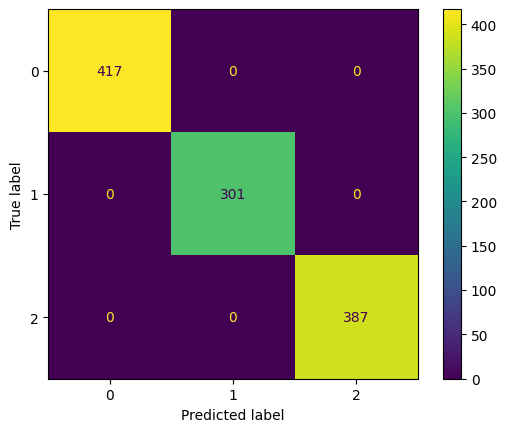

In [36]:
train_score = model.score(X_train_counts, y_train)
test_score= model.score(X_test_counts, y_test)

acc = accuracy_score(y_pred,y_test)


print('RFC Model Train Score is : ' , train_score)
print("===================================================")

print('RFC Model Test Score is : ' , test_score)
print("===================================================")

print('RFC accuracy is : ', acc)
print("===================================================")

from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
ts_acc = round(accuracy_score(y_test,y_pred),4)
print("===================================================")
print("Testing Accuracy is:-",round(ts_acc*100,2),"%")
print("===================================================")
print("Classification report for xtest data:-\n\n",classification_report(y_test,y_pred),"\n")
print("===================================================")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(model,X_test_counts, y_test))

In [44]:
y_pred

array([2, 2, 1, ..., 1, 1, 0], dtype=int64)

 <div style="background-color: pink; ">
    <p style="font-size: 24px; font-weight: bold; color: red;">Model TFDistilBertForSequenceClassification </p>
</div>

In [46]:
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification


In [47]:
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')


In [48]:
train_encoding=tokenizer(X_train.tolist(), padding=True, truncation=True)
test_encoding=tokenizer(X_test.tolist(), padding=True, truncation=True)

In [49]:
train_encoding

{'input_ids': [[101, 16660, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [50]:
#convert this encodings to dataset  object
train_dataset= tf.data.Dataset.from_tensor_slices((
dict(train_encoding), y_train
))

In [51]:
test_dataset= tf.data.Dataset.from_tensor_slices((
dict(test_encoding), y_test
))

In [52]:
train_dataset

<TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(512,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(512,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

<div style="background-color: pink; ">
    <p style="font-size: 24px; font-weight: bold; color: red;">Loading of pre-trained BERT model </p>
</div>

In [53]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments


In [54]:
training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    eval_steps=100
    
)


In [55]:
with training_args.strategy.scope():
    model = TFBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)
    

# create an instance of TFTrainer
trainer = TFTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFBertForSequenceClassification: ['vocab_projector', 'distilbert', 'activation_13', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are

KeyboardInterrupt: 

In [ ]:
trainer.evalulate(test_dataset)

In [ ]:
trainer.predict(test_dataset)

In [ ]:
output=trainer.predict(test_dataset)[1]

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, output)
precision = precision_score(y_test, output, average='weighted')
recall = recall_score(y_test, output, average='weighted')
f1 = f1_score(y_test, output, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

<div style="background-color: pink; ">
    <p style="font-size: 24px; font-weight: bold; color: red;">Loading of pre-trained BERT model </p>
</div>

In [ ]:
# Load the pre-trained BERT model
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Tokenize the data
X_train_tokens = tokenizer(X_train.tolist(), padding=True, truncation=True, max_length=128, return_tensors='tf')
X_test_tokens = tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=128, return_tensors='tf')



<div style="background-color: pink; ">
    <p style="font-size: 24px; font-weight: bold; color: red;">Model training </p>
</div>

In [ ]:
# Define the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model
history = model.fit(X_train_tokens['input_ids'], y_train)
#validation_data = model.fit(X_test_tokens['input_ids'], y_test)


<div style="background-color: pink; ">
    <p style="font-size: 24px; font-weight: bold; color: red;">Evaluation of model </p>
</div>

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test_tokens['input_ids'])
y_pred = tf.argmax(y_pred.logits, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)